# Importing All Libraries

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error


csv_file = '/content/housing.csv'
column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households',
                'median_income', 'median_house_value', 'ocean_proximity']

dataset = pd.read_csv(csv_file, names=column_names, header=0)

# Data Visualization (Historgrams)

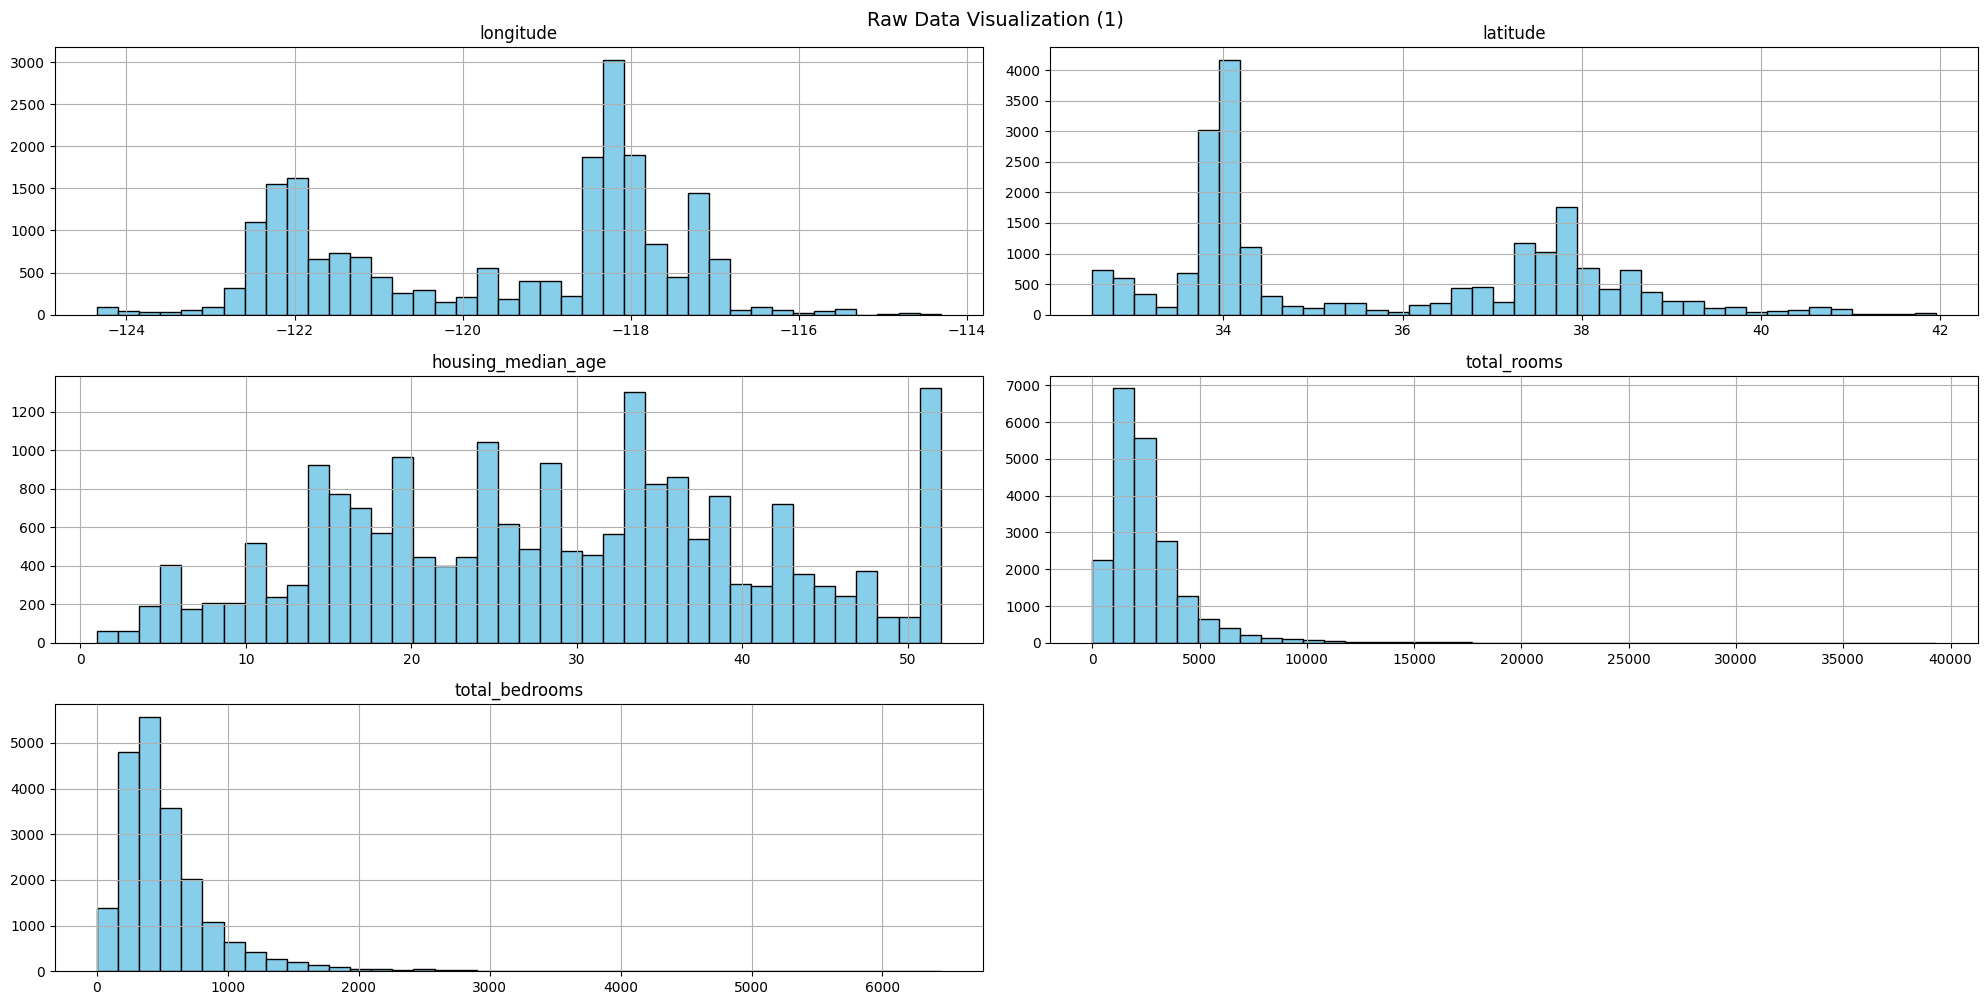

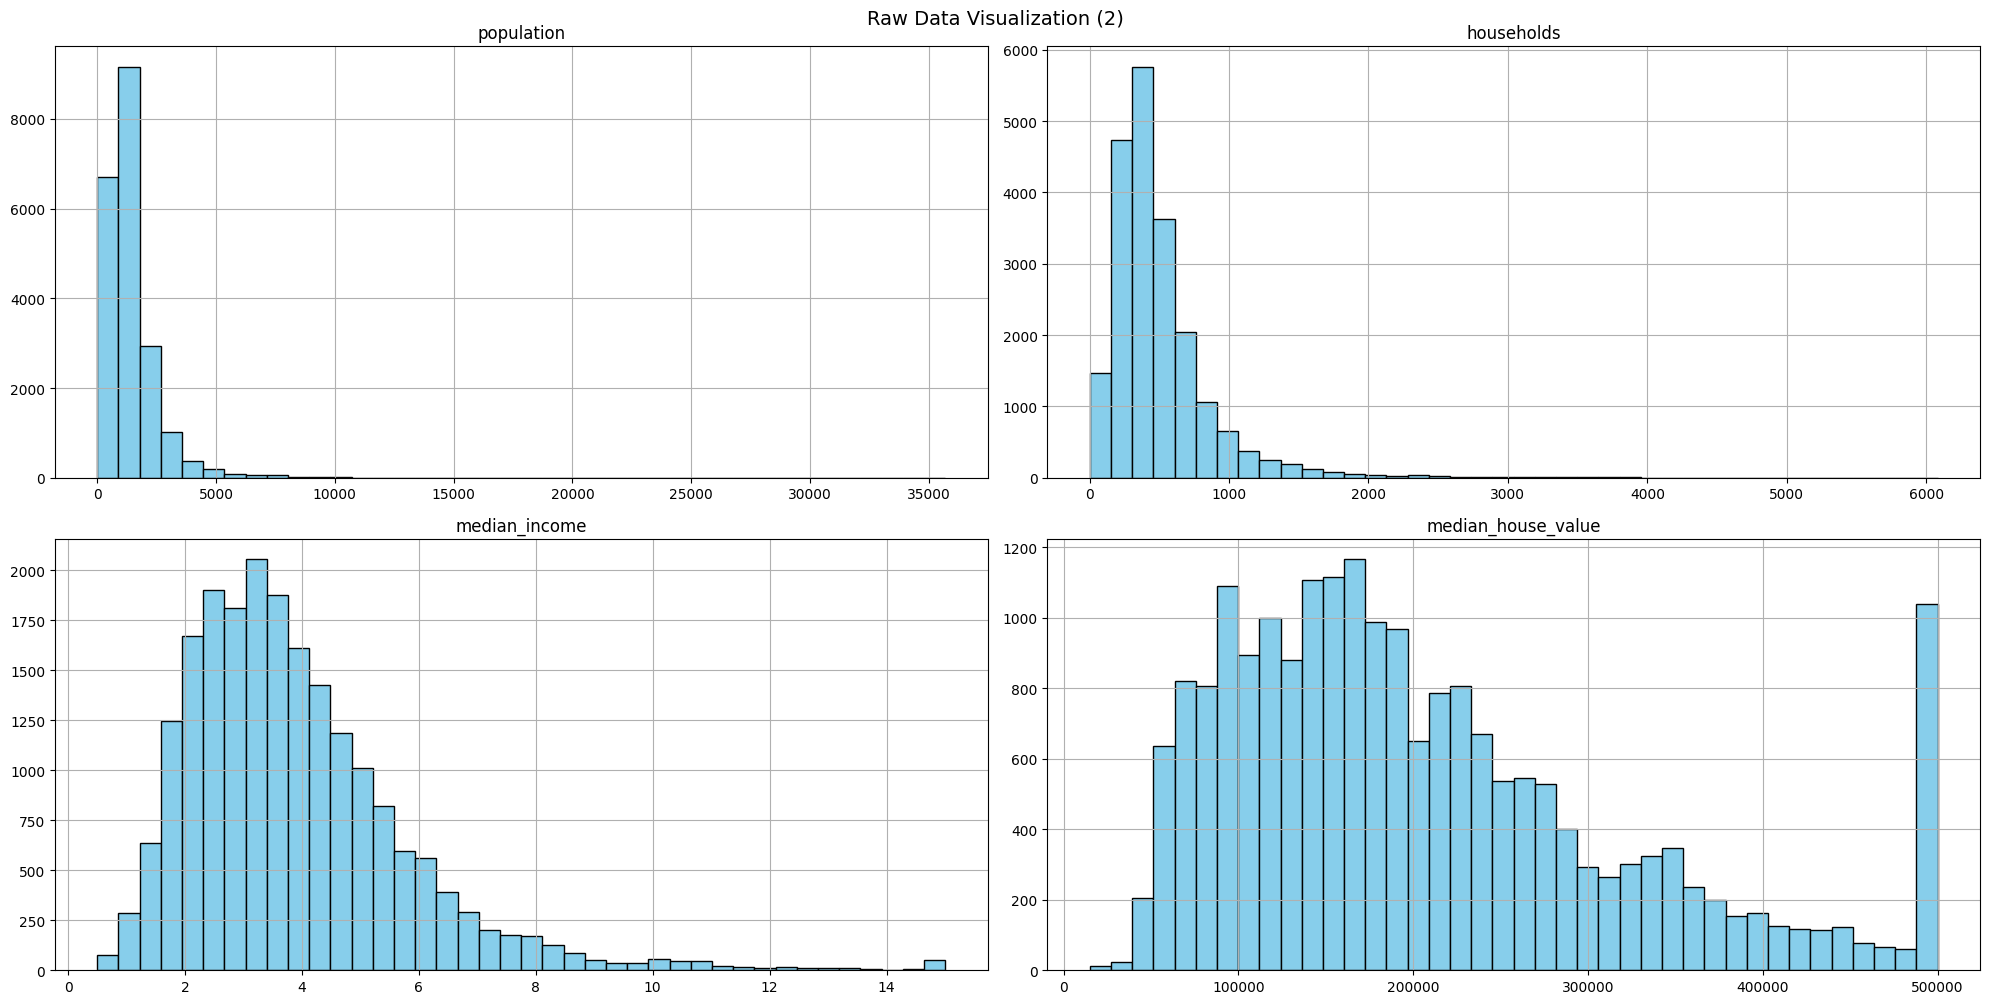

In [81]:
f_col = dataset.columns[:5]
s_col = dataset.columns[5:]

dataset[f_col].hist(bins=40, figsize=(20, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("Raw Data Visualization (1)", y=1, fontsize=14)
plt.show()

dataset[s_col].hist(bins=40, figsize=(20, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("Raw Data Visualization (2)", y=1, fontsize=14)
plt.show()

# Handling Null Values And Imputing Null Val

In [82]:
null_values = dataset.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [83]:
bed_median = dataset['total_bedrooms'].median()
dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(bed_median)
print(dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Checking Data Imbalance

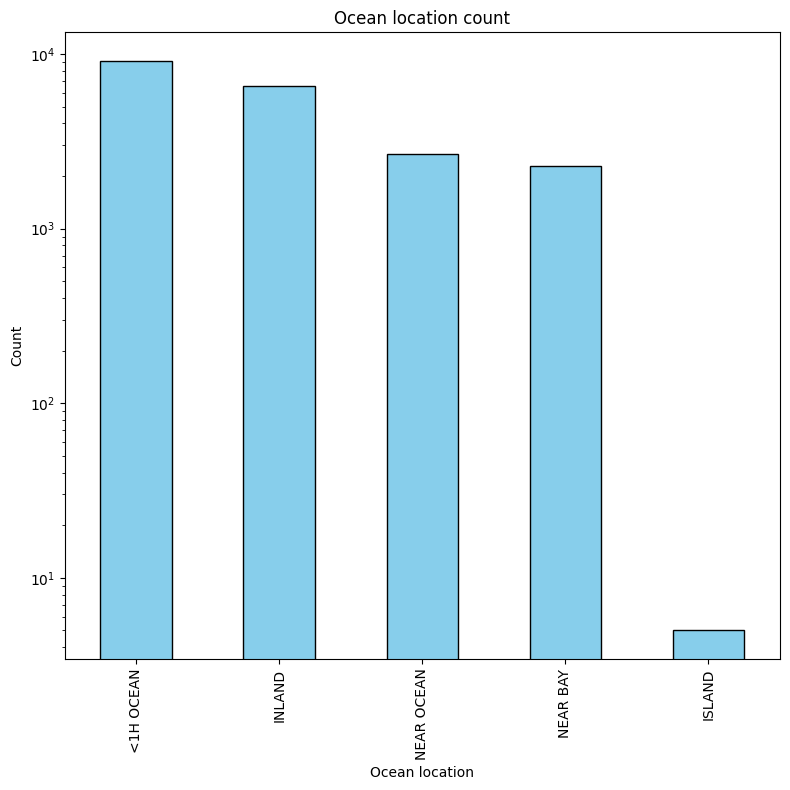

In [84]:
oce_count = dataset['ocean_proximity'].value_counts()

oce_plot = oce_count.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 8))
plt.title("Ocean location count")
plt.xlabel("Ocean location")
plt.ylabel("Count")

plt.yscale('log')
plt.tight_layout()
plt.show()

# Handling Categorical Features

In [85]:
dataset = pd.get_dummies(dataset, columns=['ocean_proximity'], prefix='oce', drop_first=True)
print(dataset.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  oce_INLAND  \
0       322.0       126.0         8.3252            452600.0       False   
1      2401.0      1138.0         8.3014            358500.0       False   
2       496.0       177.0         7.2574            352100.0       False   
3       558.0       219.0         5.6431            341300.0       False   
4       565.0       259.0         3.8462            342200.0       False   

   oce_ISLAND  oce_NEAR BAY  oce_NEAR OCEAN  
0       False          True           False  


# Feature Scaling

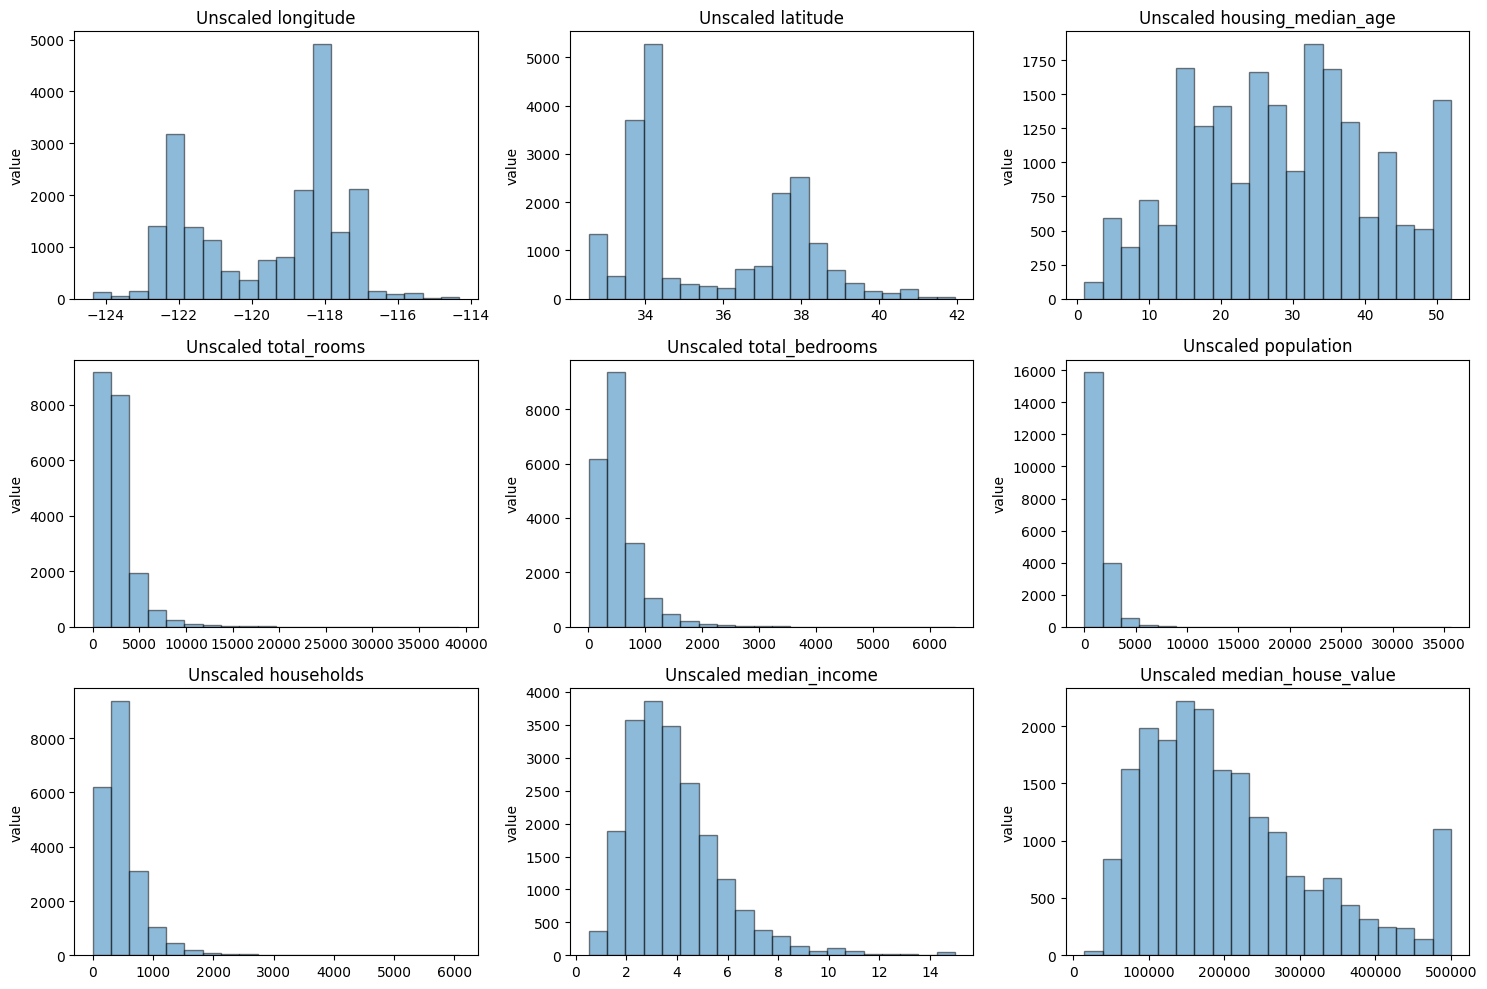

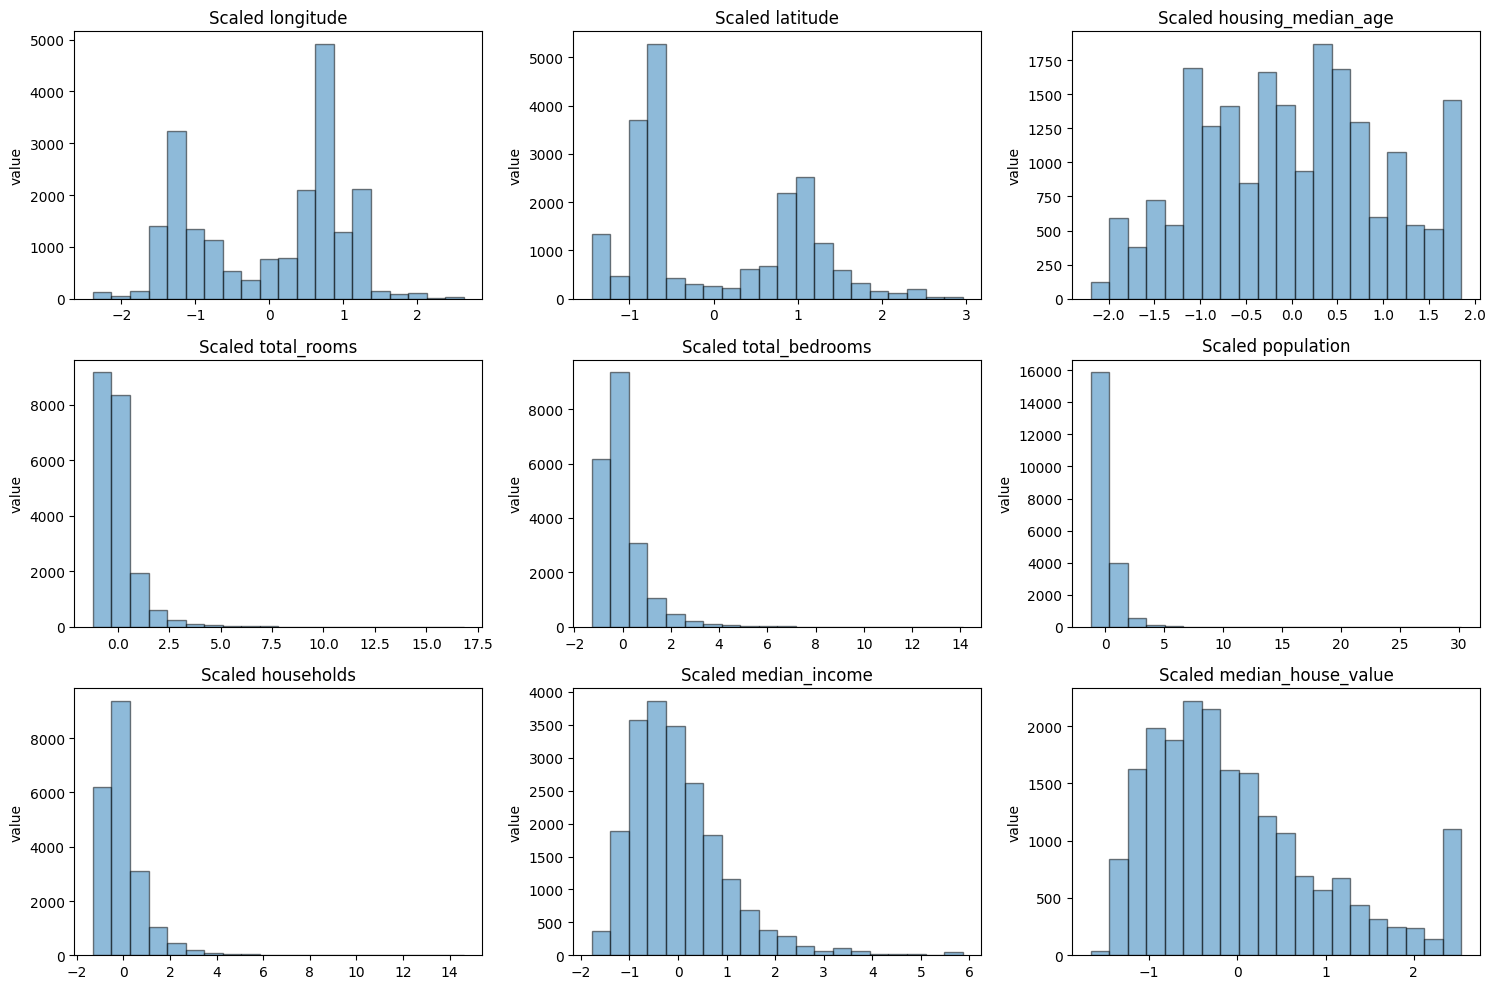

In [86]:
scaler = StandardScaler()
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households',
            'median_income', 'median_house_value']

plt.figure(figsize=(15, 10))
out_loop = 1
for i in features:
    plt.subplot(3, 3, out_loop)
    plt.hist(dataset[i], bins=20, edgecolor='black', alpha=0.5)
    plt.title(f'Unscaled {i}')
    plt.ylabel('value')
    out_loop = out_loop+ 1
plt.tight_layout()
plt.show()



dataset[features] = scaler.fit_transform(dataset[features])

plt.figure(figsize=(15, 10))
out_loop = 1
for i in features:
    plt.subplot(3, 3, out_loop)
    plt.hist(dataset[i], bins=20, edgecolor='black', alpha=0.5)
    plt.title(f'Scaled {i}')
    plt.ylabel('value')
    out_loop = out_loop+ 1
plt.tight_layout()
plt.show()

# Data Splitting And Training

In [87]:
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train: {len(X_train)}")
print(f"Test: {len(X_test)}")
#print(X_train)

Train: 14448
Test: 6192


# Heatmap for feature visualization

Text(0.5, 1.0, 'Feature Correlations')

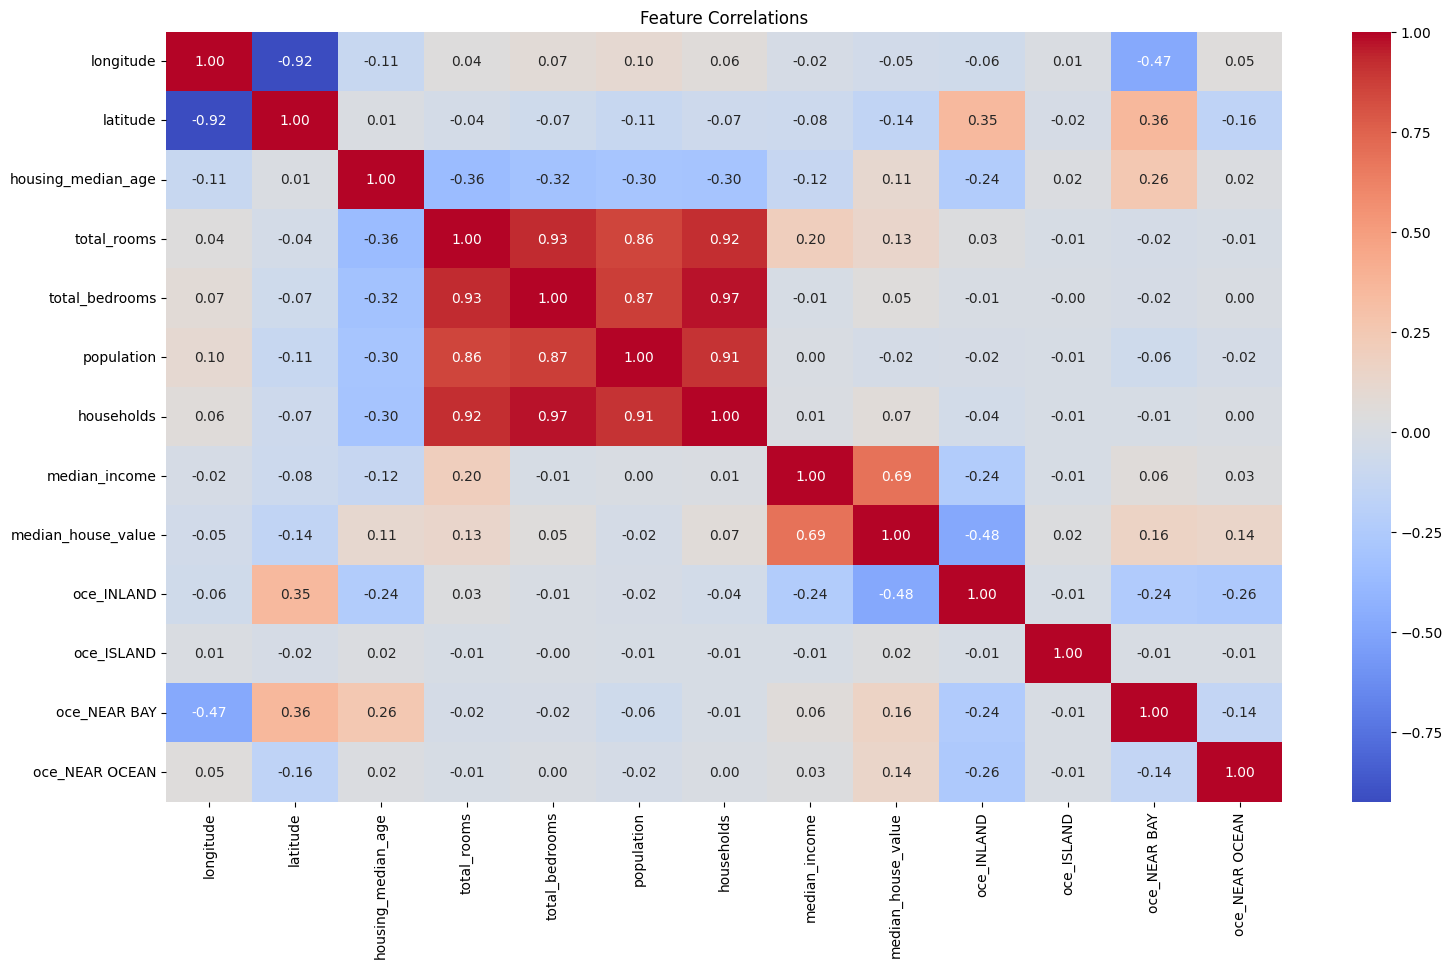

In [88]:
corr = dataset.corr()
plt.figure(figsize = (18, 10))
sns.heatmap(corr, annot = True, fmt=".2f", cmap = "coolwarm")
plt.title("Feature Correlations")

# Decision Tree Model

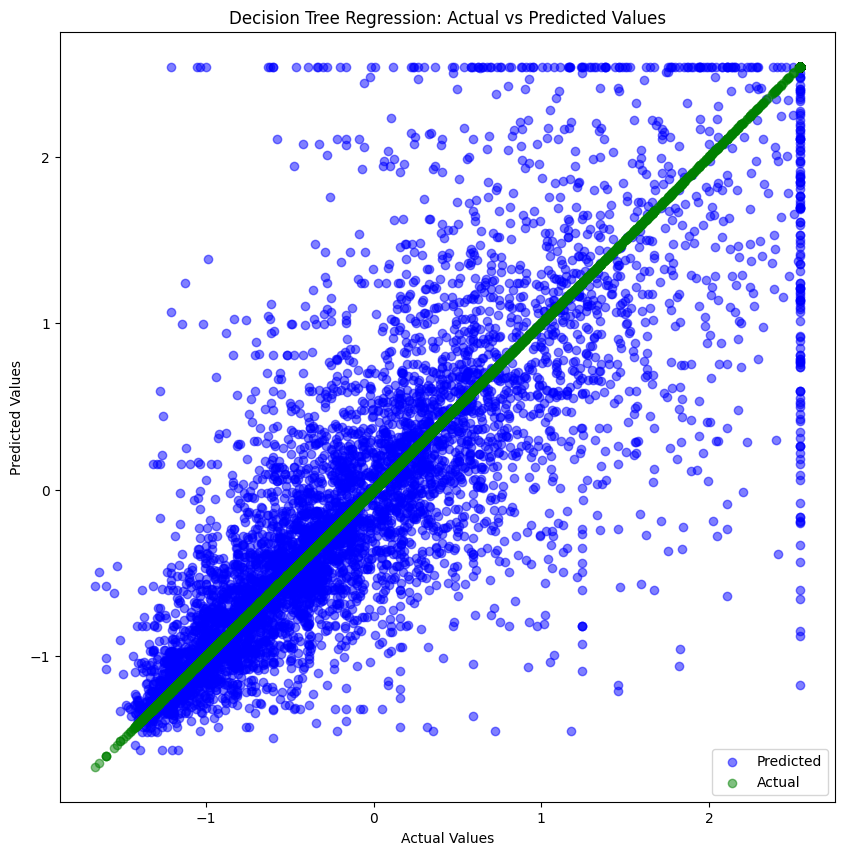

Coefficient of Determination (R²): Testing: 0.6278545340176407, Training: 1.0
Training MSE: 4.859656585697901e-32
Testing MSE: 0.366832443365389
Mean Absolute Percentage Error (MAPE): 0.38150307732402533
Cross-Validation Score: -0.3838026082441566


In [56]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_train_dt = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)

r2_val_train = r2_score(y_train, y_train_dt)
r2_val_test = r2_score(y_test, y_test_dt)


mse_val_train = mean_squared_error(y_train, y_train_dt)
mse_val_test = mean_squared_error(y_test, y_test_dt)


mape_val = mean_absolute_error(y_test, y_test_dt)
cv_val = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_dt, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.legend()
plt.show()


print(f"Coefficient of Determination (R²): Testing: {r2_val_test}, Training: {r2_val_train}")
print(f"Train MSE: {mse_val_train}")
print(f"Test MSE: {mse_val_test}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val}")
print(f"Cross-Validation Score: {cv_val}")

# Linear Regression

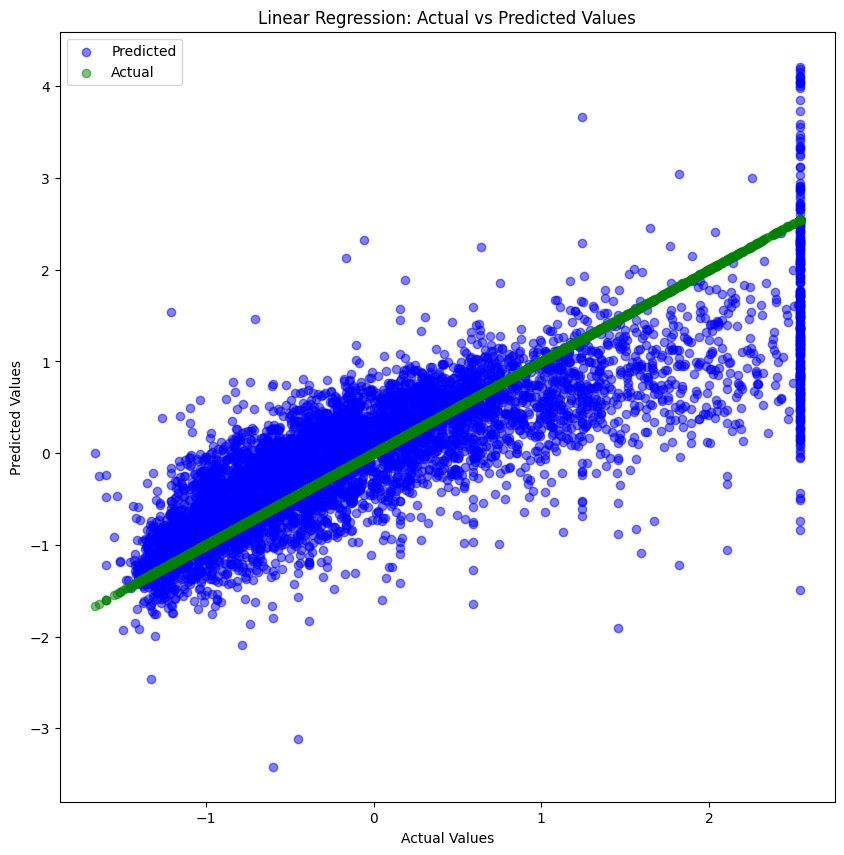

Coefficient of Determination (R²): Testing: 0.6393611711434395, Training: 0.6470480227253683
Training MSE: 0.35511113937380623
Testing MSE: 0.3554900834614912
Mean Absolute Percentage Error (MAPE): 0.43397932961673547
Cross-Validation Score: -0.3577179441308399


In [89]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

training_mse = mean_squared_error(y_train, y_train_pred)
testing_mse = mean_squared_error(y_test, y_test_pred)

mape = mean_absolute_error(y_test, y_test_pred)
cv_score = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

print(f"Coefficient of Determination (R²): Testing: {r2_test}, Training: {r2_train}")
print(f"Train MSE: {training_mse}")
print(f"Test MSE: {testing_mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Cross-Validation Score: {cv_score}")

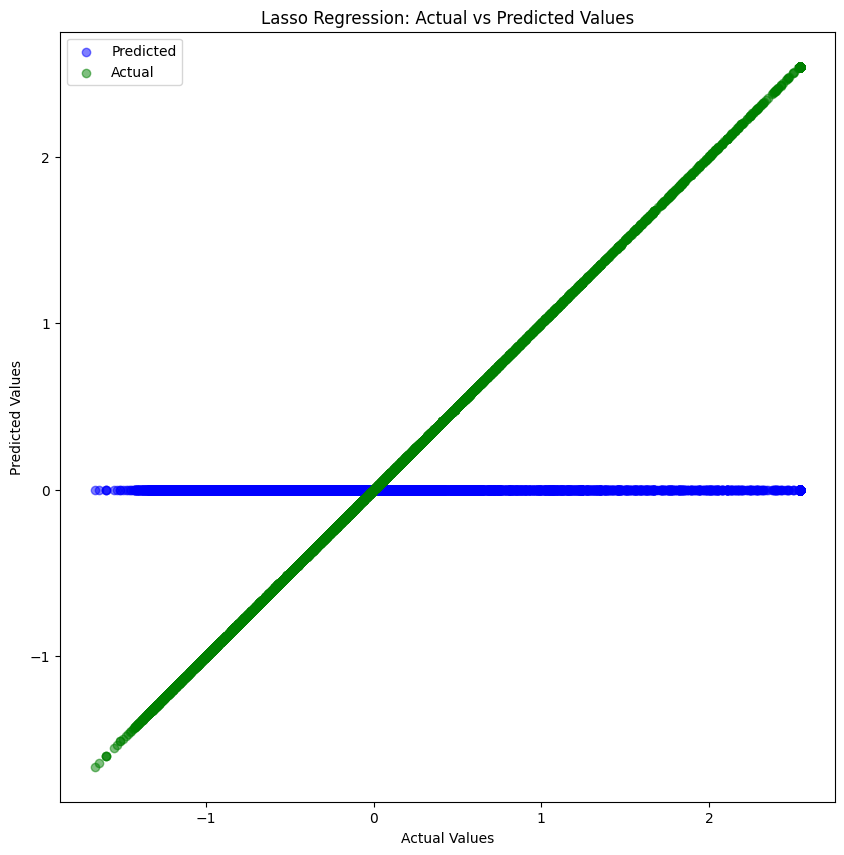

Coefficient of Determination (R²): Testing: -3.9309721393543384e-06, Training: 0.0
Training MSE: 1.0061174387400997
Testing MSE: 0.9857271387283073
Mean Absolute Percentage Error (MAPE): 0.7853181385120985
Cross-Validation Score: -1.0063472314048727


In [58]:
lin_lasso = Lasso()

lin_lasso.fit(X_train, y_train)

y_train_pred_lasso = lin_lasso.predict(X_train)
y_test_pred_lasso = lin_lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
training_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
testing_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mape_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
cv_score_lasso = cross_val_score(lin_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred_lasso, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted')
plt.legend()
plt.show()

print(f"Coefficient of Determination (R²): Testing: {r2_test_lasso}, Training: {r2_train_lasso}")
print(f"Train MSE: {training_mse_lasso}")
print(f"Test MSE: {testing_mse_lasso}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso}")
print(f"Cross-Validation Score: {cv_score_lasso}")

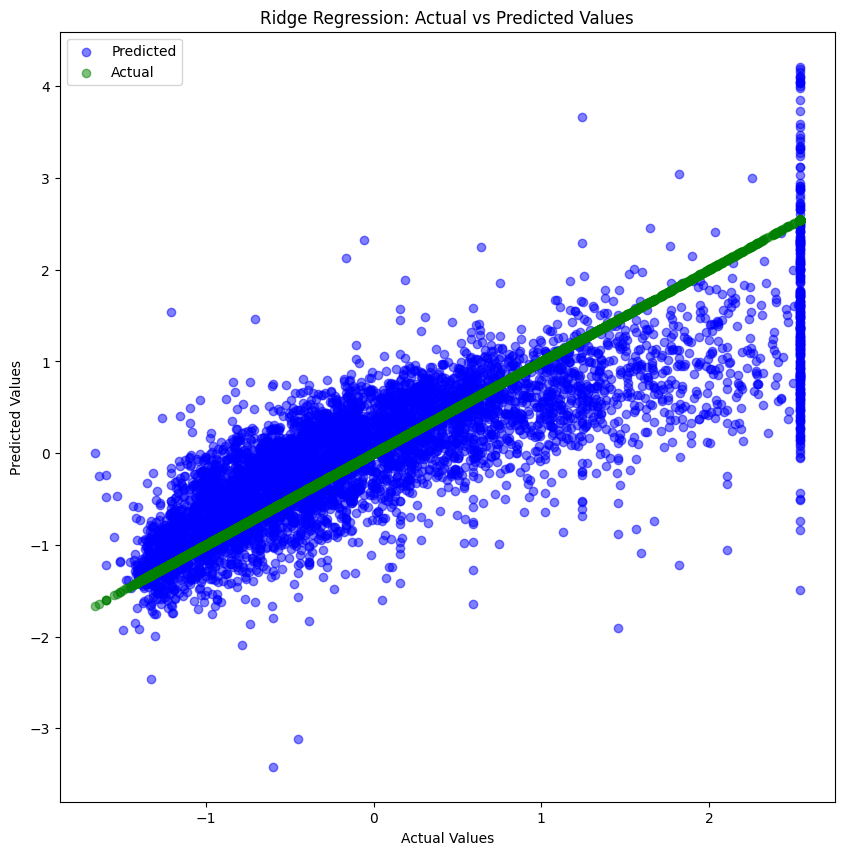

Coefficient of Determination (R²): Testing: 0.6393006195303357, Training: 0.6470327158530575
Training MSE: 0.3551265398849707
Testing MSE: 0.3555497705951929
Mean Absolute Percentage Error (MAPE): 0.43403284081422927
Cross-Validation Score: -0.35774862005237684


In [59]:
lin_ridge = Ridge()

lin_ridge.fit(X_train, y_train)

y_train_pred_ridge = lin_ridge.predict(X_train)
y_test_pred_ridge = lin_ridge.predict(X_test)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
training_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
testing_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mape_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
cv_score_ridge = cross_val_score(lin_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred_ridge, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.show()

print(f"Coefficient of Determination (R²): Testing: {r2_test_ridge}, Training: {r2_train_ridge}")
print(f"Train MSE: {training_mse_ridge}")
print(f"Test MSE: {testing_mse_ridge}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge}")
print(f"Cross-Validation Score: {cv_score_ridge}")

# SVR Model

SVR Coefficient of Determination (R²): Testing: 0.7563448795795759, Training: 0.7735179566321192
Training MSE: 0.22786753339391644
Testing MSE: 0.24017652056131497
Mean Absolute Percentage Error (MAPE): Training: 1.9126891527728367, Testing: 1.2013576648002484
Cross-Validation Score: 0.6686961243555268


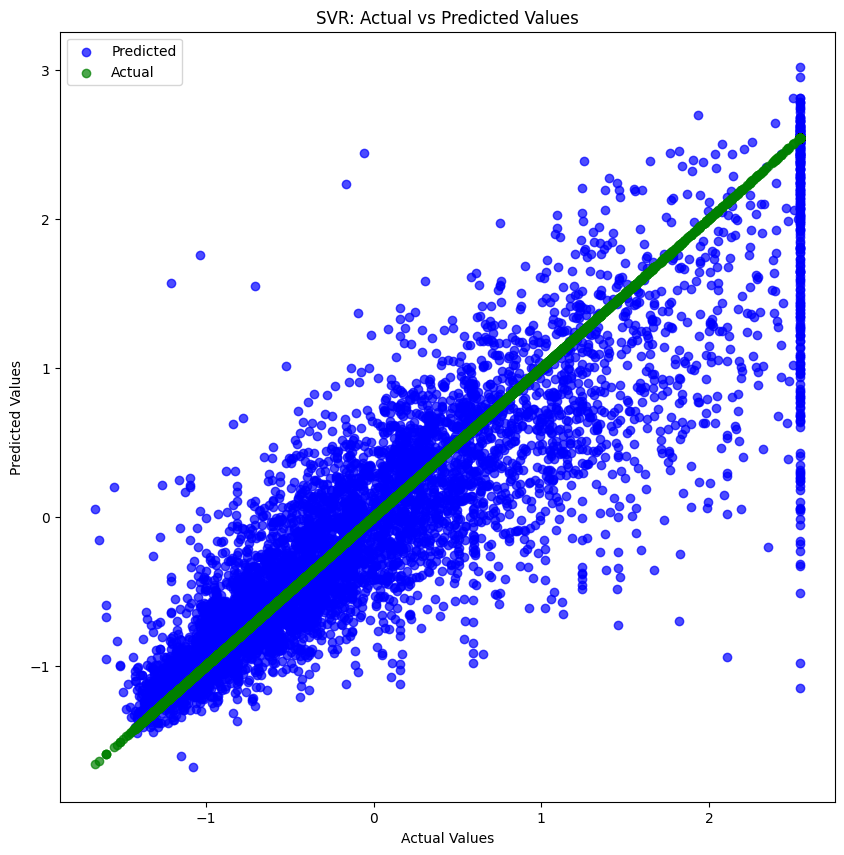

In [60]:
svr_model = SVR(kernel='rbf')

svr_model.fit(X_train, y_train)

y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

svm_r2_train = r2_score(y_train, y_train_pred)
svm_r2_test = r2_score(y_test, y_test_pred)

svm_train_mse = mean_squared_error(y_train, y_train_pred)
svm_test_mse = mean_squared_error(y_test, y_test_pred)

svm_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
svm_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

svm_cv_score = cross_val_score(svr_model, X, y, cv=5).mean()

print(f"SVR Coefficient of Determination (R²): Testing: {svm_r2_test}, Training: {svm_r2_train}")
print(f"Train MSE: {svm_train_mse}")
print(f"Test MSE: {svm_test_mse}")
print(f"Mean Absolute Percentage Error (MAPE): Training: {svm_mape_train}, Testing: {svm_mape_test}")
print(f"Cross-Validation Score: {svm_cv_score}")

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.7, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.legend()
plt.show()